# GA Data Science Q2 2016 
In-class exercise 4: Linear regression using StatsModels

In [68]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.gofplots as smg

from pandas.tools.plotting import autocorrelation_plot

%matplotlib inline

sns.set(rc={
    'figure.figsize': (8, 6),
    'font.size': 14
})

In [69]:
# Read in the EU referendum data from the 'Web scraping' code walk-through
brexit = pd.read_csv(r'..\..\Data\brexit.csv')

In [70]:
# Change the data type of 'date' to `datetime`
brexit['date'] = pd.to_datetime(brexit['date'])

In [71]:
# Create a new variable 't' representing the years between 2015-01-01 and 'date'
# (Hint: convert to `timedelta64[D]` first, then divide by 365.25)
brexit['t'] = (brexit['date'] - pd.to_datetime('2015-01-01')).astype('timedelta64[D]') / 365.25

In [72]:
brexit[:10]

,Unnamed: 0,date,pollster,stay,leave,undecided,n,t
0,0,2015-01-19,YouGov,0.430000,0.380000,0.180000,1747.0,0.049281
1,1,2015-01-26,YouGov,0.430000,0.370000,0.200000,1656.0,0.068446
2,2,2015-02-23,YouGov,0.450000,0.350000,0.200000,1772.0,0.145106
3,3,2015-02-24,YouGov,0.450000,0.370000,0.180000,1520.0,0.147844
4,4,2015-03-23,YouGov,0.426622,0.343311,0.221722,9912.0,0.221766
5,5,2015-03-25,YouGov,0.410000,0.380000,0.210000,2006.0,0.227242
6,6,2015-04-20,YouGov,0.450000,0.350000,0.200000,2078.0,0.298426
7,7,2015-04-28,YouGov,0.470000,0.330000,0.200000,1834.0,0.320329
8,8,2015-04-29,YouGov,0.520000,0.320000,0.160000,1823.0,0.323066
9,9,2015-05-04,YouGov,0.450000,0.330000,0.210000,1664.0,0.336756


In [75]:
# Build a regression model for 'stay' versus 't'
brexit_model1 = sm.formula.ols('stay ~ t', data = brexit).fit()

In [76]:
# Examine the model output
brexit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   stay   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     11.16
Date:                Wed, 18 May 2016   Prob (F-statistic):            0.00124
Time:                        11:22:43   Log-Likelihood:                 194.47
No. Observations:                  88   AIC:                            -384.9
Df Residuals:                      86   BIC:                            -380.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4515      0.007     60.313      0.000         0.437     0.466
t             -0.0268      0.008     -3.340      0.001        -0.043    -0.011
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.075
Skew:                           0.312   Prob(JB):                        0.215
Kurtosis:                       3.670   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

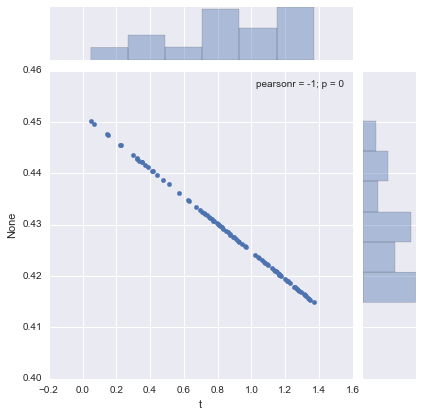

In [79]:
# Produce the following diagnostic plots:
# * Predicted versus observed
# Looking for violations of linearity or additivity
sns.jointplot(brexit['t'], brexit_model1.fittedvalues)

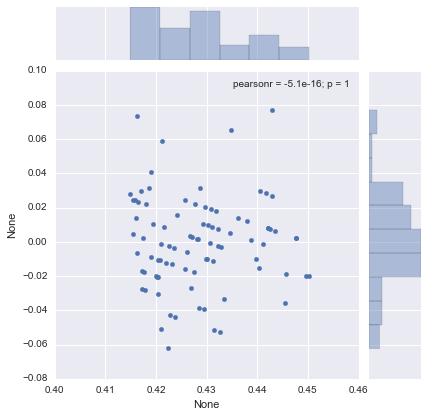

In [81]:
# * Residuals versus predicted
# Looking for violations of homoskedasticity
sns.jointplot(brexit_model1.fittedvalues, brexit_model1.resid)

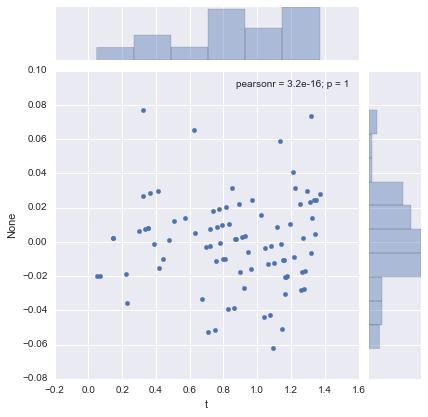

In [82]:
# * Residuals versus 't'
# Looking for violations of homoskedasticity
sns.jointplot(brexit['t'], brexit_model1.resid)

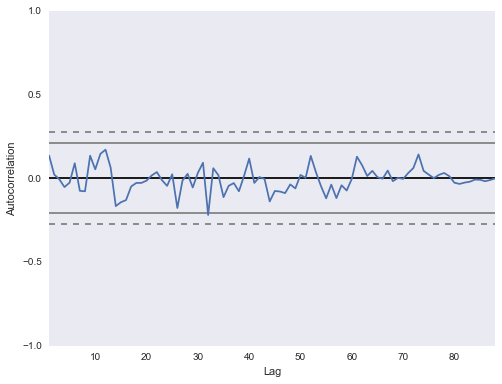

In [83]:
# * Autocorrelation plot
# looking for violations of independence
autocorrelation_plot(brexit_model1.resid)

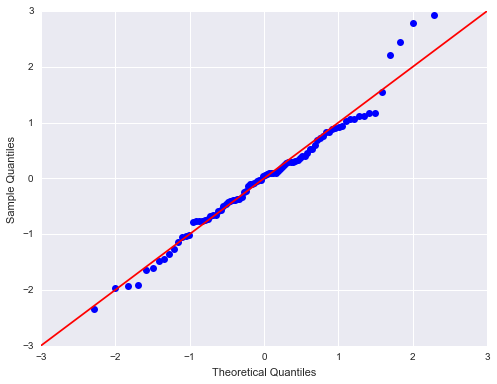

In [88]:
# * Normal Q-Q plot for (Studentised) residuals
st_resid = brexit_model1.get_influence().get_resid_studentized_external() # Studentised residuals
qq = sm.graphics.qqplot(st_resid)
smg.qqline(qq.gca(), '45')

In [89]:
# BONUS: Build a second regression model for 'stay' versus 't' and 'pollster',
#        and re-run all of the above
brexit_model2 = sm.formula.ols('stay ~ t + pollster', data = brexit).fit()

In [90]:
brexit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   stay   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     9.696
Date:                Wed, 18 May 2016   Prob (F-statistic):           1.46e-05
Time:                        12:47:19   Log-Likelihood:                 202.19
No. Observations:                  88   AIC:                            -396.4
Df Residuals:                      84   BIC:                            -386.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.4731      0.009     51.596      0.000         0.455     0.491
pollster[T.Survation]    -0.0052      0.008     -0.614      0.541        -0.022     0.012
pollster[T.YouGov]       -0.0241      0.006     -3.890      0.000        -0.036    -0.012
t                        -0.0385      0.008     -4.787      0.000        -0.055    -0.023
==============================================================================
Omnibus:                       16.426   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.041
Skew:                           0.809   Prob(JB):                     6.02e-06
Kurtosis:                       4.985   Cond. No.                         6.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
predictors = ['t', 'pollster']
response = 'stay'

brexit_vars = predictors + [response]

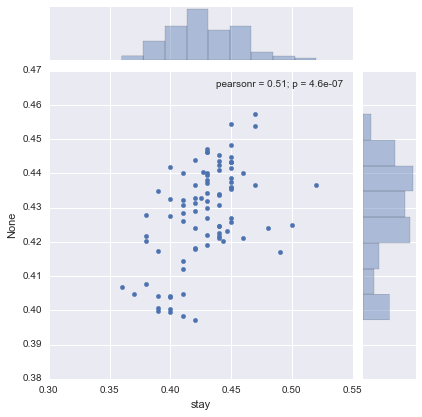

In [98]:
# * Predicted versus observed
# Looking for violations of linearity or additivity
sns.jointplot(brexit[response], brexit_model2.fittedvalues)

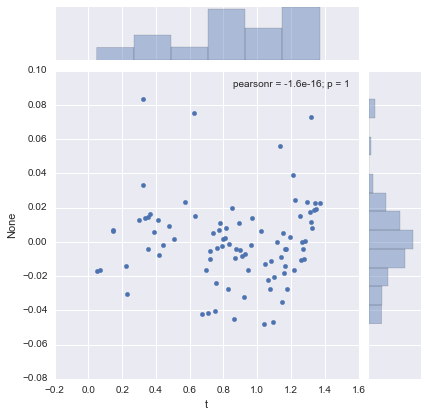

In [100]:
# * Residuals versus 't'
# Looking for violations of homoskedasticity
sns.jointplot(brexit['t'], brexit_model2.resid)

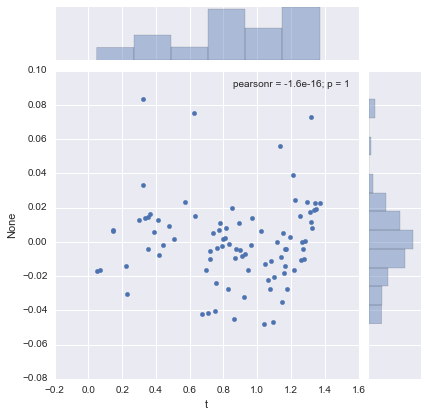

In [101]:
# * Residuals versus independent variable 't'
# Looking for violations of homoskedasticity
sns.jointplot(brexit['t'], brexit_model2.resid)

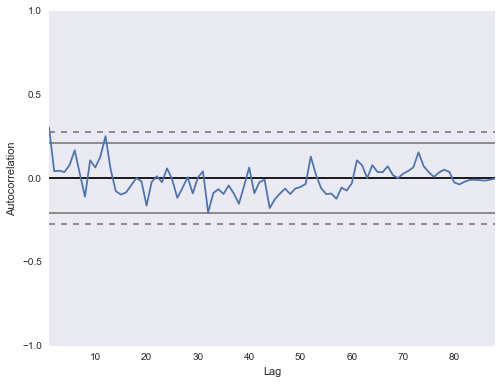

In [103]:
# * Autocorrelation plot
# looking for violations of independence
autocorrelation_plot(brexit_model2.resid)

In [ ]:
# Predicted versus observed
sns.jointplot(ncds[response], model1.fittedvalues)

# Residuals versus predicted
sns.jointplot(model1.fittedvalues, model1.resid)

# Residuals versus 'n920' (predictor)
sns.jointplot(ncds.n920, model1.resid)

# Residuals versus row number
sns.pointplot(ncds.index, model1.resid, join=False)

# Autocorrelation plot (most useful for time series)
autocorrelation_plot(model1.resid)

# Durbin-Watson test for autocorrelation at lag 1
sms.durbin_watson(model1.resid)

# Studentised residuals
st_resid = model1.get_influence().get_resid_studentized_external()

# Studentised residuals versus row number
sns.pointplot(ncds.index, st_resid, join=False)

# Normal Q-Q plot for residuals
qq = smg.qqplot(st_resid)
smg.qqline(qq.gca(), '45')

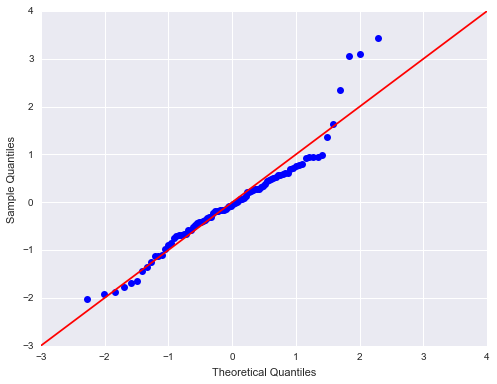

In [104]:
# * Normal Q-Q plot for (Studentised) residuals
st_resid = brexit_model2.get_influence().get_resid_studentized_external() # Studentised residuals
qq = sm.graphics.qqplot(st_resid)
smg.qqline(qq.gca(), '45')